# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar un  diccionario con en el siguiente orden:

* cantidad de columnas
* Nombre de las columnas
* número de registros no NaN de cada columna
* cantidad total de memoria usada para cargar el dataset en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None


# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandas pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)




# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]

#Solución problema 1 

In [ ]:
#Bibliotecas
import pandas as pd
import seaborn as sns              
import matplotlib.pyplot as plt

In [ ]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTWsahNju_LTtJBjuaaILBx_3QutbzK-HCjGoLtrtcIBEu4rOQgdiz17AD8SDa13g/pub?output=csv"
df = pd.read_csv(path)
df.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,0:00,29,20,35,NaN
1,02/01/2009,0:00,19,3,22,NaN
2,03/01/2009,0:00,24,12,22,NaN
3,04/01/2009,0:00,24,8,15,NaN
4,05/01/2009,0:00,120,111,141,NaN


In [ ]:
#convertir la serie Date en el indice (serie de tiempo) y eliminar la serie Unnamed: 1
df = df.set_index("Date")
del df["Unnamed: 1"]
df.head () #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
Date,,,,
01/01/2009,29,20,35,NaN
02/01/2009,19,3,22,NaN
03/01/2009,24,12,22,NaN
04/01/2009,24,8,15,NaN
05/01/2009,120,111,141,NaN


In [ ]:
def punto_1 (df):

  def cantidad_columnas (df): #Función para conocer la cantidad de columnas del data frame(df).

    Cantidad_De_Colunmas = len(df.columns) 
    return Cantidad_De_Colunmas

  def nombre_columnas (df): #Función para conocer los nombres de las columnas del data frame(df).

    Nombre_de_columnas = list (df.columns) #ponerlo en una lista para que no salga "Index" ni el "typo"

    return  Nombre_de_columnas

  info_df = df.describe() #Guarda en info_df la irformacion estadistica del data frame(df).

  def registros_NaN (df): #Calcula el número de registros no NaN de cada columna y lo guarda en un diccionario.
                          #En el diccionario se guarda el nombre de la colunma y la cantidad de datos no NaN

    registros_NaN_colunma = []
    registros_NaN_colunma_diccionario = {}

    for col in info_df.columns:

      total_datos_NaN = (info_df.loc ["count",col] )
      
      registros_NaN_colunma.append(total_datos_NaN)

      registros_NaN_colunma_diccionario[col] = total_datos_NaN

    return registros_NaN_colunma_diccionario 

  def cantidad_de_memoria (df): #Calcula la memoria usada en cada columna y lo guarda en un diccionario.
                                #En el diccionario se guarda el nombre de la colunma y la cantidad de memoria que usa

    memoria_columnas = df.memory_usage()
    registros_memoria = {}

    for col in info_df.columns:

        registros_memoria[col] = memoria_columnas[col]
      

    return registros_memoria 


  def estadistica (df):  #Crea una serie de la media,desviación y maximo de las columna del data frame
                        #Posterior mente crea diccionarios que continen los nombre de las columna y su dato

    media = df.mean(axis=0)
    desviacion =  df.std(axis=0)
    maximo = df.max(axis=0)
    registros_media = {}
    registros_desviacion = {}
    registros_maximo = {}

    for col in df.columns:

      registros_media[col] = media[col]
      registros_desviacion[col] = desviacion[col]
      registros_maximo[col] = maximo[col]

    return [registros_media, registros_desviacion,registros_maximo]

  diccionario_final = {}
  diccionario_final["Cantidad de columnas"] = cantidad_columnas (df)
  diccionario_final["Nombre de las columnas"] = nombre_columnas(df)
  diccionario_final["Número de registros no NaN de cada columna"] = registros_NaN(df)
  diccionario_final["Cantidad de memoria"] = cantidad_de_memoria(df)
  diccionario_final["Media"] = estadistica(df)[0]
  diccionario_final["Desviación estandar"] = estadistica(df)[1]
  diccionario_final["Maximos"] = estadistica(df)[2] 
  return diccionario_final
  
punto_1 (df)

{'Cantidad de columnas': 4,
 'Cantidad de memoria': {'Berri1': 2920,
  'Brebeuf': 2920,
  'Maisonneuve_1': 2920,
  'Maisonneuve_2': 2920},
 'Desviación estandar': {'Berri1': 1878.8797986572208,
  'Brebeuf': 2484.0047433344985,
  'Maisonneuve_1': 1079.5330858971347,
  'Maisonneuve_2': 1854.3685230878293},
 'Maximos': {'Berri1': 6626.0,
  'Brebeuf': 7575.0,
  'Maisonneuve_1': 4242.0,
  'Maisonneuve_2': 6587.0},
 'Media': {'Berri1': 2032.2,
  'Brebeuf': 2576.3595505617977,
  'Maisonneuve_1': 1060.2520547945205,
  'Maisonneuve_2': 2093.1698630136984},
 'Nombre de las columnas': ['Berri1',
  'Maisonneuve_1',
  'Maisonneuve_2',
  'Brebeuf'],
 'Número de registros no NaN de cada columna': {'Berri1': 365.0,
  'Brebeuf': 178.0,
  'Maisonneuve_1': 365.0,
  'Maisonneuve_2': 365.0}}

***Remplazar los NaN por None***

In [ ]:
# como en el data frame solo hay valores NaN  en la columna 'Brebeuf', basta con:

data_fram_NaN_por_None = df.fillna("None")
data_fram_NaN_por_None.head () #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
Date,,,,
01/01/2009,29,20,35,None
02/01/2009,19,3,22,None
03/01/2009,24,12,22,None
04/01/2009,24,8,15,None
05/01/2009,120,111,141,None


#Solución problema 2

In [ ]:
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQqCpt9ad3JYNclQrdwHtqJVnMlMyNHI-p176ceLZSIZxK9aacD5xaCE3M5oItoTQOjsgm7aEXXW-V0/pub?output=csv"
df = pd.read_csv(path)
df.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()


,Unnamed: 0,Primary Type,Date
0,0,DECEPTIVE PRACTICE,09/24/2019 8:00:00 AM
1,1,THEFT,10/13/2019 8:30:00 PM
2,2,THEFT,10/05/2019 6:30:00 PM
3,3,CRIMINAL DAMAGE,10/13/2019 7:00:00 PM
4,4,ASSAULT,10/13/2019 2:10:00 PM


**1.Ver la estadistica general del data frame.**

In [ ]:
df.info() #información del data frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   Primary Type  1000 non-null   object
 2   Date          1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
df.describe() #Muestra las estadisticas generales del data frame, pero por la naturaleza del mismo la unica columna con valores solo numericos es "Unnamed: 0"

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [ ]:
df["Primary Type"].describe() #Muestra estadisticas de la columna "Primary Type"

count      1000
unique       23
top       THEFT
freq        296
Name: Primary Type, dtype: object

In [ ]:
df["Date"].describe() #Muestra estadisticas de la columna "Date"

count                      1000
unique                      679
top       10/13/2019 9:00:00 PM
freq                         19
Name: Date, dtype: object

**2.Dejar las columnas PrimaryType, y Date.**

In [ ]:
del df["Unnamed: 0"] #Elimina la columna "Unnamed: 0" del data fram
df.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()


,Primary Type,Date
0,DECEPTIVE PRACTICE,09/24/2019 8:00:00 AM
1,THEFT,10/13/2019 8:30:00 PM
2,THEFT,10/05/2019 6:30:00 PM
3,CRIMINAL DAMAGE,10/13/2019 7:00:00 PM
4,ASSAULT,10/13/2019 2:10:00 PM


**3.Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandas pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").**

In [ ]:
df.Date=pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p") #Transformar la columna Date que es tipo string en una tipo Fecha.
df.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

,Primary Type,Date
0,DECEPTIVE PRACTICE,2019-09-24 08:00:00
1,THEFT,2019-10-13 20:30:00
2,THEFT,2019-10-05 18:30:00
3,CRIMINAL DAMAGE,2019-10-13 19:00:00
4,ASSAULT,2019-10-13 14:10:00


**4.Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee: df.groupby(columna).Date.count().sort_values()**

In [ ]:
datos = df.groupby("Primary Type").Date.count().sort_values(ascending=True) #Mostrar los casos totales para cada tipo de crimen de forma ascendente
CasosTotales = pd.DataFrame(datos).reset_index()
CasosTotales = CasosTotales.rename(columns={"Date":"Contador"})
CasosTotales.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

,Primary Type,Contador
0,STALKING,1
1,CONCEALED CARRY LICENSE VIOLATION,1
2,LIQUOR LAW VIOLATION,2
3,PROSTITUTION,2
4,SEX OFFENSE,3


**5.Ordenar los valores por orden alfabetico de Primary type**

In [ ]:
df.sort_values(by=['Primary Type']) #Ordena la columna "Primaty Type" de forma alfabetica.
df_alfabetico = df.sort_values(by=['Primary Type']) 
df_alfabetico.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

,Primary Type,Date
145,ARSON,2019-10-13 21:47:00
992,ARSON,2019-10-14 03:57:00
406,ARSON,2019-05-08 00:53:00
516,ASSAULT,2019-10-13 04:32:00
519,ASSAULT,2019-10-13 15:11:00


**6.Mostrar de la fila 100 a la 120**

In [ ]:
filas_pedidas = df.iloc[100:121] #Crea un data frame llamado "df_filas_pedidas" con las filas 100 a la 120 del data frame original.
filas_pedidas.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()

 


,Primary Type,Date
100,INTERFERENCE WITH PUBLIC OFFICER,2019-10-13 22:34:00
101,OTHER OFFENSE,2019-10-13 14:02:00
102,BATTERY,2019-10-13 13:21:00
103,THEFT,2019-04-03 09:15:00
104,BATTERY,2019-10-13 00:26:00


**7.Realizar una visualización de los datos anteriores.Emplee la libreria seaborn con un grafico tipo barplot. Ej. ax = sns.barplot(x = "contador", y="Primary Type", data = datos)**

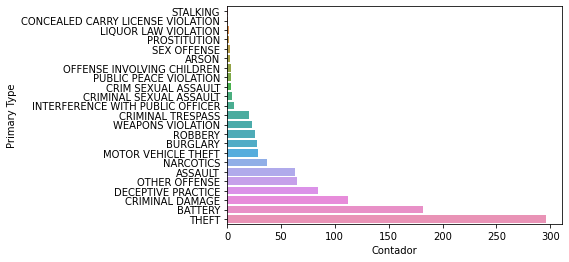

In [ ]:
ax = sns.barplot(x = "Contador", y="Primary Type", data = CasosTotales)

#Solución problema 3

**1.Leer el dataset country_vaccinations.csv y filtrar los datos para Colombia**

In [ ]:
#Leer el dataset
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vRmD-B26heuOg89DcrbK5Z1p_v1geCA1J7aFOH6P1wJaDJxb7rczwny-arJ09ZbRylh_cxBM4YLEQpA/pub?gid=1484596314&single=true&output=csv"
df = pd.read_csv(path)
df.head() #muestra la cabeza del  df , si se quiere ver todo el df eliminar el .head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
#Filta los datos para Colombia.
df[df['country'] == 'Colombia'].head() #muestra la cabeza del filtro para colombia "Datos_colombia", si se quiere ver todo el df eliminar el .head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1841,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1842,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,195.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1843,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,209.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1844,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.07,NaN,NaN,217.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1845,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,196.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...


**2.Crear un csv con los datos para colombia**

In [ ]:
Datos_colombia = df[df['country'] == 'Colombia']  #Data frame con datos de Colombia.
Datos_colombia.head() #muestra la cabeza del  df "Datos_colombia", si se quiere ver todo el df eliminar el .head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1841,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1842,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,195.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1843,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,209.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1844,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.07,NaN,NaN,217.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1845,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,196.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...


**3.Realizar una comparacion con los paises latinoamericanos.**

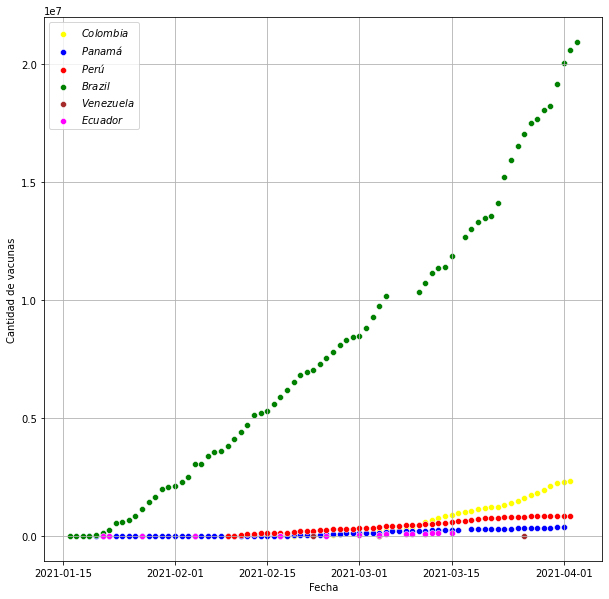

In [ ]:
#Comparación con los paises vecinos de Colombia (Panamá,Perú,Brazil,Venezuela,Ecuador), respecto a la cantidad de vacunas en el país

#En esta parte del codigo se sacan data frame para cada país y se organiza la fecha
Datos_Colombia = df[df['country'] == 'Colombia']
Datos_Colombia = Datos_Colombia.reset_index()
Datos_Colombia.date=pd.to_datetime(Datos_Colombia.date,format="%Y/%m/%d") 
Datos_Colombia.groupby("date").date.count().sort_values(ascending=True)
Datos_Panama = df[df['country'] == 'Panama']
Datos_Panama = Datos_Panama.reset_index()
Datos_Panama.date=pd.to_datetime(Datos_Panama.date,format="%Y/%m/%d") 
Datos_Panama.groupby("date").date.count().sort_values(ascending=True)
Datos_Peru = df[df['country'] == 'Peru']
Datos_Peru = Datos_Peru.reset_index()
Datos_Peru.date=pd.to_datetime(Datos_Peru.date,format="%Y/%m/%d") 
Datos_Peru.groupby("date").date.count().sort_values(ascending=True)
Datos_Brazil = df[df['country'] == 'Brazil']
Datos_Brazil = Datos_Brazil.reset_index()
Datos_Brazil.date=pd.to_datetime(Datos_Brazil.date,format="%Y/%m/%d") 
Datos_Brazil.groupby("date").date.count().sort_values(ascending=True)
Datos_Venezuela = df[df['country'] == 'Venezuela']
Datos_Venezuela = Datos_Venezuela.reset_index()
Datos_Venezuela.date=pd.to_datetime(Datos_Venezuela.date,format="%Y/%m/%d") 
Datos_Venezuela.groupby("date").date.count().sort_values(ascending=True)
Datos_Ecuador = df[df['country'] == 'Ecuador']
Datos_Ecuador = Datos_Ecuador.reset_index()
Datos_Ecuador.date=pd.to_datetime(Datos_Ecuador.date,format="%Y/%m/%d") 
Datos_Ecuador.groupby("date").date.count().sort_values(ascending=True)


#Se realiza la grafica
plt.figure(figsize=(10,10))
sns.scatterplot(data = Datos_Colombia, x=Datos_Colombia.date[0:46], y="total_vaccinations",color="yellow",label="$Colombia$")
sns.scatterplot(data = Datos_Panama, x=Datos_Panama.date[0:74], y="total_vaccinations",color="blue",label="$Panamá$")
sns.scatterplot(data = Datos_Peru, x=Datos_Peru.date[0:54], y="total_vaccinations",color="red",label="$Perú$")
sns.scatterplot(data = Datos_Brazil, x=Datos_Brazil.date[0:79], y="total_vaccinations",color="green",label="$Brazil$")
sns.scatterplot(data = Datos_Venezuela, x=Datos_Venezuela.date[0:54], y="total_vaccinations",color="brown",label="$Venezuela$")
sns.scatterplot(data = Datos_Ecuador, x=Datos_Ecuador.date[0:54], y="total_vaccinations",color="magenta",label="$Ecuador$")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de vacunas")
plt.grid(True)
plt.legend()
plt.show()

**4.A traves de mascaras determinar el numero de vacunados en el intervalo [1.5E6, 2.0E6]**

In [ ]:
#crear la mascara para "people_vaccinated"

df_mascara = df[(df["people_vaccinated"] >= 1.5E6) & (df['people_vaccinated'] <= 2.0E6)] #Mascara aplicada a la columna "Total_vaccionations" del df original
df_mascara = df_mascara[["country","people_vaccinated"]] #Modificar el df "df_mascara" para que solo tenga la columna  "country" y "total_vaccionations"
df_mascara = df_mascara.rename(columns={"country": "País", "people_vaccinated":"Personas vacunadas"})#Traudcir y cambiar los nombres de las columnas.
df_mascara.head() #muestra la cabeza del  df "df_mascara", si se quiere ver todo el df eliminar el .head()


                          

,País,Personas vacunadas
365,Argentina,1564555.0
366,Argentina,1719543.0
367,Argentina,1876113.0
368,Argentina,1932696.0
369,Argentina,1952883.0
